In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

FEATURE_SIZE=13

# Importing the dataset
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:,0:FEATURE_SIZE].values
y = dataset.iloc[:, FEATURE_SIZE].values

In [2]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [3]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import Callback, EarlyStopping

def auc_roc(y_true, y_pred):
    value, update_op = tf.metrics.auc(y_pred, y_true)
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value

c:\users\eric\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
from keras.optimizers import Adam
from keras.initializers import RandomUniform,Constant
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import metrics

optimizer = 'Adam'
learning_rate = 0.001
decay = 1e-6
momentum = 0.8
layer_weight_initializer_min = -0.005
layer_weight_initializer_max = 0.005
bias_initializer = 0.001
beta_1 = 0.95
beta_2 = 0.999
epsilon = 1e-08
adam = Adam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
batch_size = 512 
iteration_times = 500
EPOCHS=20
# hypermeters objects
random_initializer = RandomUniform(minval=layer_weight_initializer_min, maxval=layer_weight_initializer_max)
bias_init = Constant(value=bias_initializer)


In [12]:
model = Sequential()
model.add(Dense(512, input_shape=(x_train.shape[1],), use_bias=True, kernel_initializer=random_initializer,
                activation='relu',bias_initializer=bias_init))
model.add(Dropout(0.2))
model.add(Dense(512, use_bias=True, kernel_initializer=random_initializer, activation='relu',
                bias_initializer=bias_init))
model.add(Dropout(0.2))
model.add(Dense(1, use_bias=False, kernel_initializer=random_initializer))
# model.add(Dense(1, use_bias=False, kernel_initializer=random_initializer,activation='sigmoid'))

my_callbacks = [EarlyStopping(monitor='auc_roc', patience=5, verbose=1, mode='max')]

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=[auc_roc])

In [13]:
history = model.fit(x_train,
                    y_train,
                    shuffle=True,
                    epochs=EPOCHS,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    callbacks=my_callbacks)

Train on 80020 samples, validate on 20005 samples
Epoch 1/20
80020/80020 [==============================] - 7s 86us/step - loss: 0.5486 - auc_roc: 0.0000e+00 - val_loss: 0.2693 - val_auc_roc: 0.0000e+00
Epoch 2/20
80020/80020 [==============================] - 6s 79us/step - loss: 0.1883 - auc_roc: 0.0000e+00 - val_loss: 0.1556 - val_auc_roc: 0.0000e+00
Epoch 3/20
80020/80020 [==============================] - 6s 81us/step - loss: 0.1419 - auc_roc: 0.5409 - val_loss: 0.1344 - val_auc_roc: 0.7574
Epoch 4/20
80020/80020 [==============================] - 6s 78us/step - loss: 0.1299 - auc_roc: 0.7629 - val_loss: 0.1258 - val_auc_roc: 0.7662
Epoch 5/20
80020/80020 [==============================] - 7s 84us/step - loss: 0.1272 - auc_roc: 0.7680 - val_loss: 0.1331 - val_auc_roc: 0.7695
Epoch 6/20
80020/80020 [==============================] - 7s 82us/step - loss: 0.1482 - auc_roc: 0.7683 - val_loss: 0.1666 - val_auc_roc: 0.7671
Epoch 7/20
80020/80020 [==============================] - 7s 82u

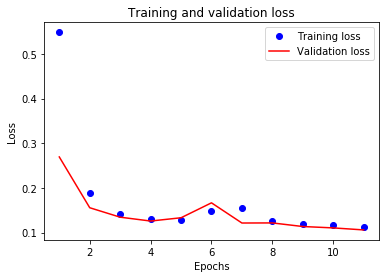

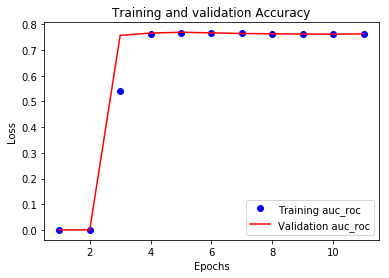

In [14]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt

auc_roc = history.history['auc_roc']  # train acc
val_auc_roc = history.history['val_auc_roc']  # val acc
# acc = history.history['binary_accuracy']  # train acc
# val_acc = history.history['val_binary_accuracy']  # val acc
loss = history.history['loss']  # train loss
val_loss = history.history['val_loss']  # val loss

# epochs = range(1, len(acc)+1)  # iterations
epochs = range(1, len(auc_roc)+1)  # iterations

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plt.clf()  # clar figure
# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

plt.clf()  # clar figure
plt.plot(epochs, auc_roc, 'bo', label='Training auc_roc')
plt.plot(epochs, val_auc_roc, 'r', label='Validation auc_roc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
model.evaluate(x_test, y_test)

20005/20005 [==============================] - 2s 101us/step


[0.10590712343647767, 0.7637417702310176]

In [16]:
testdata = pd.read_csv('test.csv')
x_testing = testdata.iloc[:,0:FEATURE_SIZE].values
x_testing = sc.transform(x_testing)

predictions=model.predict(x_testing)

In [17]:
new_predictions=[]
for prediction in predictions:
    if prediction[0]>=1:
        new_predictions.append(1)
    else:
        new_predictions.append(prediction[0])

In [18]:
import csv
with open("kaggle.csv","w",newline="") as csvfile:
    writer=csv.writer(csvfile)
    writer.writerow(["Id","Prediction"])
    test_id=1
    for prediction in new_predictions:
        writer.writerow([test_id,prediction])
        test_id+=1